# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets,cluster

In [0]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [6]:
print(iris.DESCR) #顯示資料集iris

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris.keys() #列出所有key值; data: x欄位值, target: y值, target_names: y的類別, feature_names: x欄位名稱

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

欄位說明:

1.  sepal length in cm(花萼長)
2.  sepal width in cm(花萼寬)
3.  petal length in cm(花瓣長)
4.  petal width in cm(花瓣寬)
5.  class

In [15]:
iris.feature_names #欄位名稱

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
df = pd.DataFrame(iris.data, columns=iris.feature_names) #
df['class'] = iris.target #target是類別

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0.5, 0, 'sepal length (cm)')

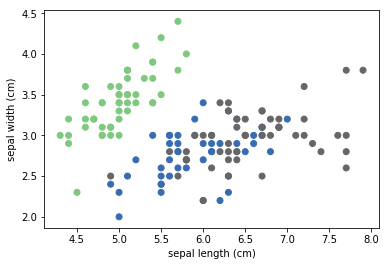

In [14]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['class'], cmap='Accent') #Cmap則是color map, Accent??

plt.ylabel( 'sepal width (cm)')
plt.xlabel('sepal length (cm)')

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [0]:
km = cluster.KMeans(n_clusters = 3).fit(X)

In [0]:
y_label = km.labels_ #分群結果

In [24]:
y_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

sklearn.metrics 的 silhouette_score() 方法: 數值愈接近 1 表示績效愈好，反之愈接近 -1 表示績效愈差

In [0]:
from sklearn import metrics

In [28]:
silhouette_avg = metrics.silhouette_score(X, y_label)
print('Sil score: ', silhouette_avg) #很低吧

Sil score:  0.5528190123564091


In [0]:
#查哪一個K最好
s_avgs = []
ks = range(2,8)

for k in ks:
  km = cluster.KMeans(n_clusters = k).fit(X)
  y_label = km.labels_
  
  s_avg = metrics.silhouette_score(X, y_label)
  s_avgs.append(s_avg)
       

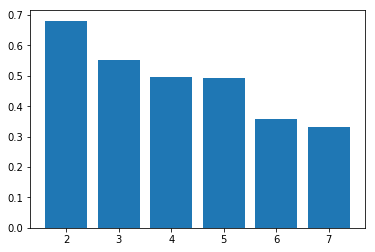

[0.681046169211746, 0.5528190123564091, 0.49745518901737446, 0.49123997967644706, 0.35876521549077595, 0.3321052807680333]


In [36]:
plt.bar(ks, s_avgs)
plt.show()
print(s_avgs)

In [31]:
# k= 2比較好

range(2, 8)